<a href="https://colab.research.google.com/github/somia-moslhy/applied-data-science-capstone/blob/main/Falcon9_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Exploratory Data Analysis

In this notebooke, we will explore the data, identify patterns. Here’s an outline of what you should include in your EDA:

1. Data Overview
2. Visualization

**Note:** In this notebook, we will use Matplotlib, Seaborn, and Plotly to visualize our data.

## 1. Data Overview
Let's check the basic structure of the dataset, including missing values, data types, and summary statistics to understand the range and distribution of numerical variables.


In [2]:
df=pd.read_csv("/content/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1011,-80.577366,28.561857


In [3]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  Block           90 non-null     float64
 12  ReusedCount     90 non-null     int64  
 13  Serial          90 non-null     object 
 14  Longitude       90 non-null     float64
 15  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), object(6)
memory usage: 9.5+ KB


In [4]:
# Summary statistics
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093


In [5]:
# Calculate the percentage of missing values for each column in the DataFrame 'data_falcon9'
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing = percent_missing.apply(lambda x: f'{x:.0f}%')
percent_missing_df = pd.DataFrame({ 'percent_missing': percent_missing})
print(percent_missing_df)

               percent_missing
FlightNumber                0%
Date                        0%
BoosterVersion              0%
PayloadMass                 0%
Orbit                       0%
LaunchSite                  0%
Outcome                     0%
Flights                     0%
GridFins                    0%
Reused                      0%
Legs                        0%
Block                       0%
ReusedCount                 0%
Serial                      0%
Longitude                   0%
Latitude                    0%


In [6]:
# 1: Calculate the number of launches on each site
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [7]:
# 2: Calculate the number and occurrence of each orbit
df['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
ES-L1,1
HEO,1


In [8]:
# Counting the occurrences of each unique outcome
#creates a series that counts how many times each unique value appears in the Outcome column of the dataframe df.
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

,count
Outcome,
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


The `Outcome` column in the dataset refers to the result of the booster landing attempt after a SpaceX launch. Here's what the various values represent:

1. **True ASDS**: The booster successfully landed on an Autonomous Spaceport Drone Ship (ASDS), which is a floating platform in the ocean.
2. **None None**: There was no landing attempt made, meaning the mission either didn't involve a landing or the data on the landing attempt is missing.
3. **True RTLS**: The booster successfully returned to land and landed at the designated landing site, which is referred to as "Return to Launch Site" (RTLS).
4. **False ASDS**: The booster attempted to land on the drone ship (ASDS) but failed.
5. **True Ocean**: The booster successfully landed in the ocean (usually refers to a controlled splashdown for expendable rockets).
6. **False Ocean**: The booster attempted to land in the ocean but failed.
7. **None ASDS**: A landing was scheduled on the ASDS, but no actual attempt was made or no data is available.
8. **False RTLS**: The booster attempted to return to land (RTLS) but failed.


In [9]:
#This loop iterates through the unique landing outcomes (from landing_outcomes.keys()), printing both the index (i) and the outcome (outcome).
#This helps understand the types of outcomes present in the data and their corresponding position.
#landing_outcomes.keys(): This part gets a list of all the unique landing outcomes (e.g., 'True ASDS', 'None None', etc.).
# enumerate(): This function takes the list of outcomes and assigns a numerical index (starting from 0) to each outcome.
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [10]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [11]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
landing_class = []
for key, value in df['Outcome'].items():
    if value in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [12]:
df['Class']=landing_class
df[['Class']].head(10)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [13]:
df.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5.0,12,B1060,-80.577366,28.561857,1


## 2. Visualization


In [14]:
# Calculate overall mission success and failure
success_counts = df['Class'].value_counts()
labels = ['Success', 'Failure']
sizes = [success_counts[1], success_counts[0]]  # Success is 1, Failure is 0

# First Pie Chart: Overall Mission Success
fig1 = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=0.3)])
fig1.update_layout(title_text='Overall Mission Success')

# Calculate success rate by orbit type
orbit_success = df[df['Class'] == 1]['Orbit'].value_counts()  # Only successful missions
orbit_labels = orbit_success.index.tolist()
orbit_sizes = orbit_success.values.tolist()

# Show the figures
fig1.show()

In [15]:
# Second Pie Chart: Success by Orbit Type
fig2 = go.Figure(data=[go.Pie(labels=orbit_labels, values=orbit_sizes, hole=0.3)])
fig2.update_layout(title_text='Success by Orbit Type')
fig2.show()


### 1. Visualize the relationship between Flight Number and PayLoadMass and overlay the outcome of the launch


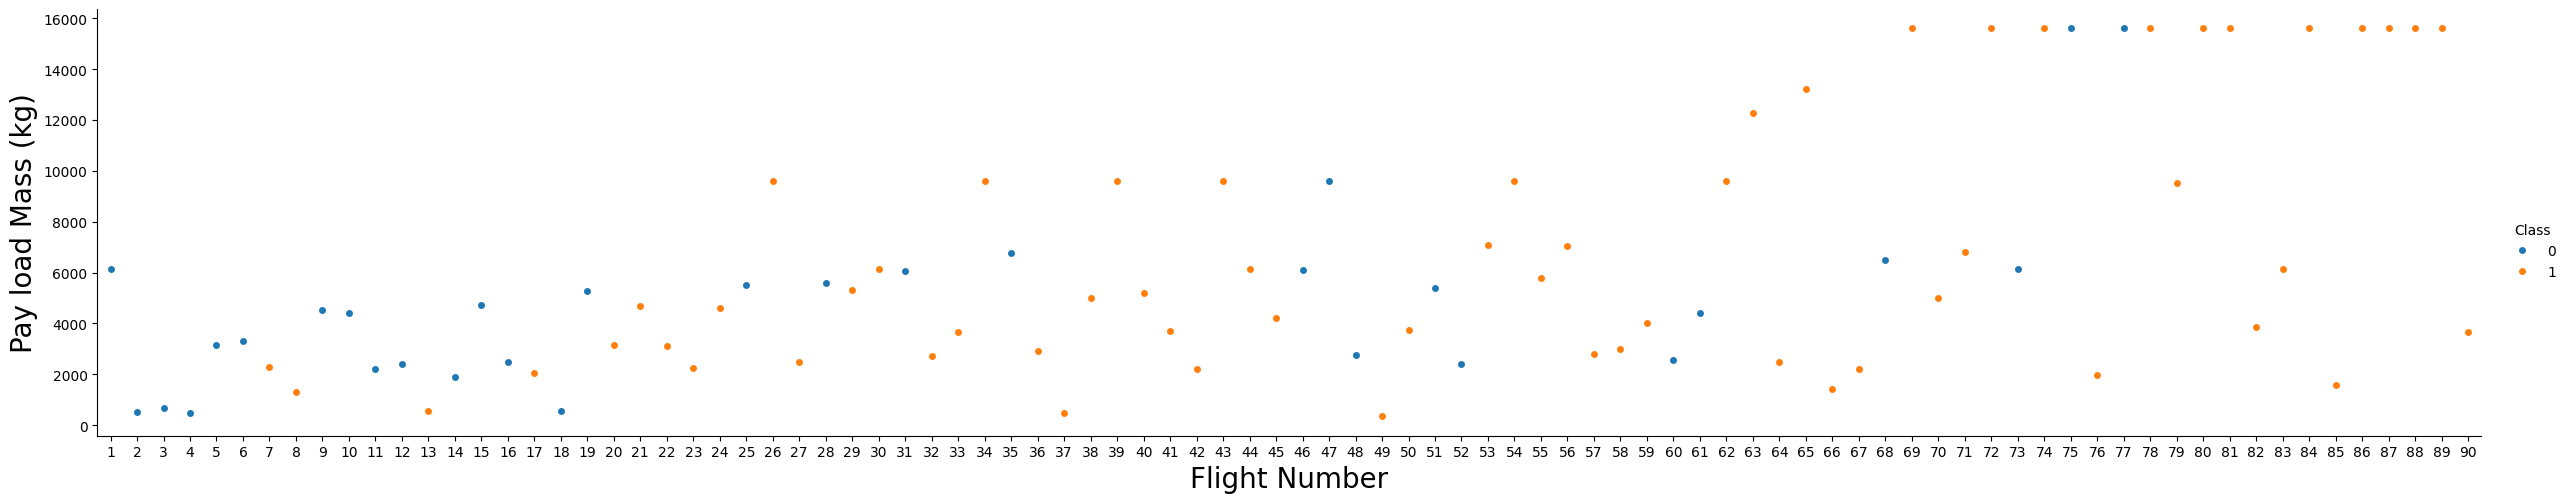

In [16]:
#FlightNumber vs. PayloadMass
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We can plot out the FlightNumber vs. PayloadMass and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return but when the flight numbers increase the first stage is more likely to land successfully even though the payload mass is massive .

### 2. Visualize the relationship between Flight Number and Launch Site


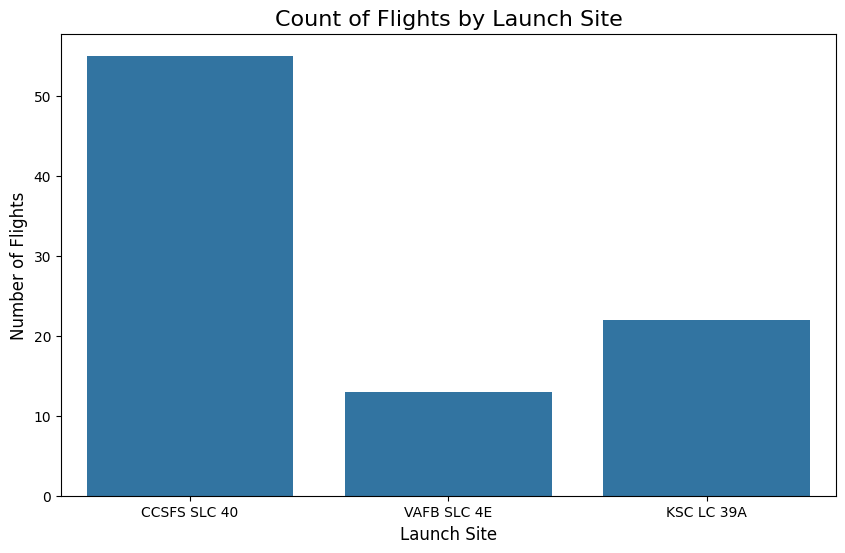

In [17]:
# Set the size of the plot
plt.figure(figsize=(10,6))

# Create a bar plot to visualize the count of flights for each launch site
sns.countplot(x='LaunchSite', data=df)

# Add title and labels to the plot
plt.title('Count of Flights by Launch Site', fontsize=16)
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)

# Show the plot
plt.show()

In [18]:
fig = px.scatter_geo(df, lon='Longitude', lat='Latitude', hover_name="LaunchSite",
                     title="Launch Sites Geographic Distribution")
fig.update_geos(projection_type="natural earth")
fig.show()

##2. Visualize the relationship between Payload and Launch Site

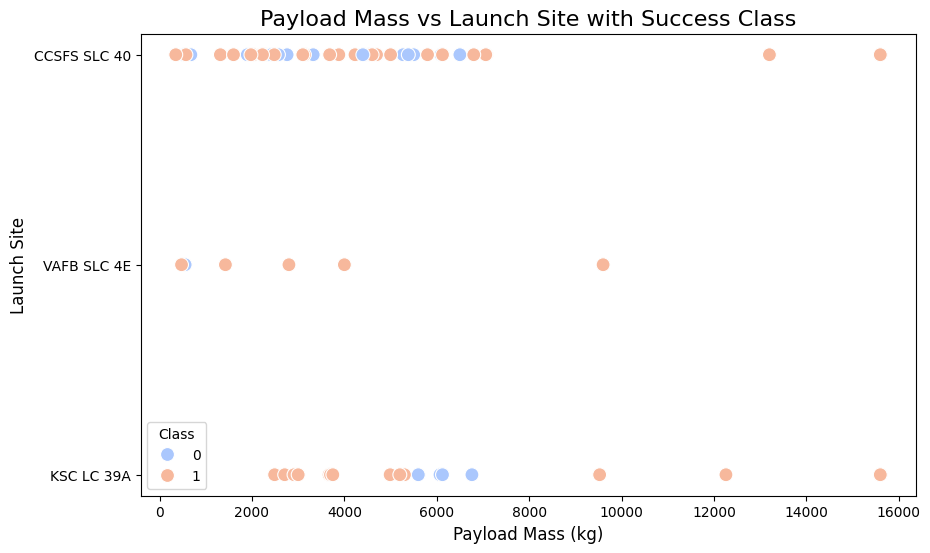

In [19]:
# Set the size of the plot
plt.figure(figsize=(10,6))

# Create a scatter plot with hue based on the class (success/failure)
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, palette='coolwarm', s=100)

# Add title and labels
plt.title('Payload Mass vs Launch Site with Success Class', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)

# Show the plot
plt.show()

 We observe Payload Vs. Launch Site scatter point chart that we find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


## 3.Visualize the relationship between success rate of each orbit type

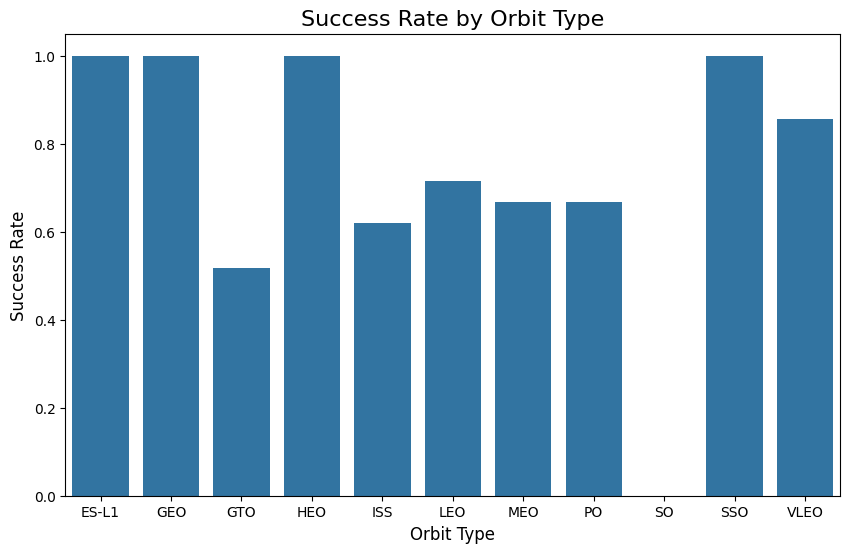

In [20]:
# Group by 'Orbit' and calculate the mean success rate
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(10,6))

# Create a bar plot to visualize the success rate of each orbit type
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)

# Add title and labels to the plot
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)

# Show the plot
plt.show()

The plot shows the success rates of missions to various orbit types:

- **High Success Rates**: ES-L1, GEO, VLEO,HEO ,and SSO have very high success rates, indicating reliable technological and operational strategies.
- **Moderate Success Rates**: ISS, MEO, PO, and  LEO have success rates around 0.6-0.8, suggesting some variability due to complexity or lesser frequency of missions.
- **Lower Success Rate**: GTO has a lower success rate, likely due to the challenges of precise maneuvers and complex mission profiles.
- **Suborbital (SO)**: has no successful flights

## 4.Visualize the relationship between FlightNumber and Orbit type

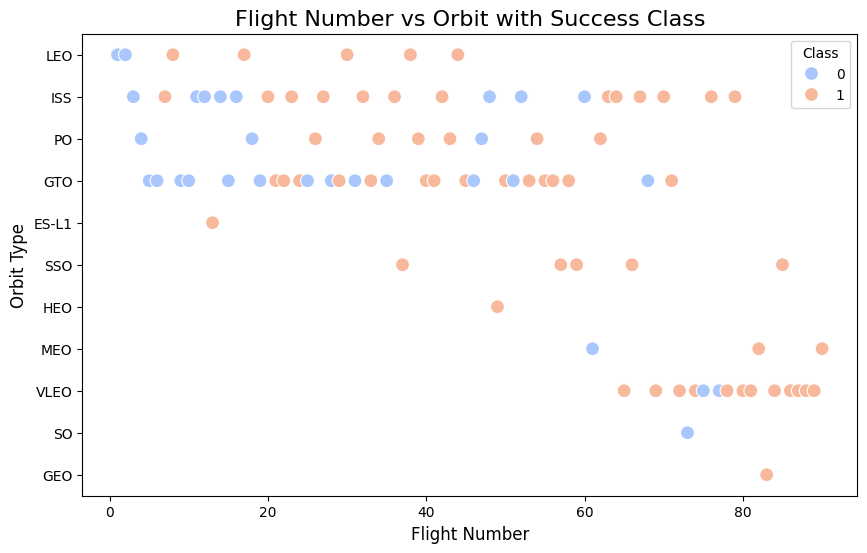

In [21]:
# Set the size of the plot
plt.figure(figsize=(10,6))

# Create a scatter plot with hue based on the class (success/failure)
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='coolwarm', s=100)

# Add title and labels
plt.title('Flight Number vs Orbit with Success Class', fontsize=16)
plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)

# Show the plot
plt.show()

## 5.Visualize the relationship between Payload and Orbit type

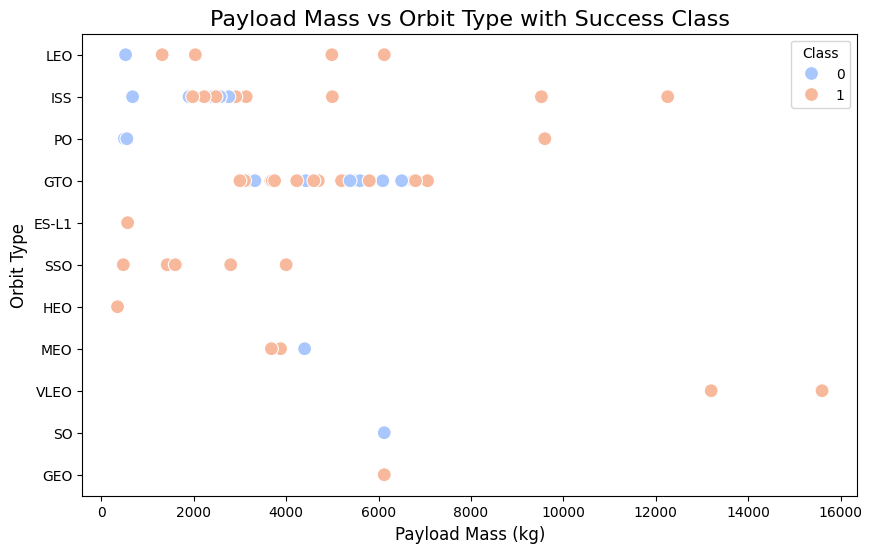

In [22]:
# Set the size of the plot
plt.figure(figsize=(10,6))

# Create a scatter plot with hue based on the class (success/failure)
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='coolwarm', s=100)

# Add title and labels
plt.title('Payload Mass vs Orbit Type with Success Class', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)

# Show the plot
plt.show()

* GTO and LEO seem to be common orbits for payloads, showing mixed success but with a tendency for success as the payload mass increases.
* Payload Mass and Success: No strict relationship is observed between payload mass and success. Success depends more on the orbit type and other mission factors than just mass.
* Sparse Data for Other Orbits: Orbits like MEO, VLEO, and SSO have fewer launches, making it harder to infer patterns about payload mass and success from this plot alone.

## 6.Visualize the launch success yearly trend

In [23]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

We can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

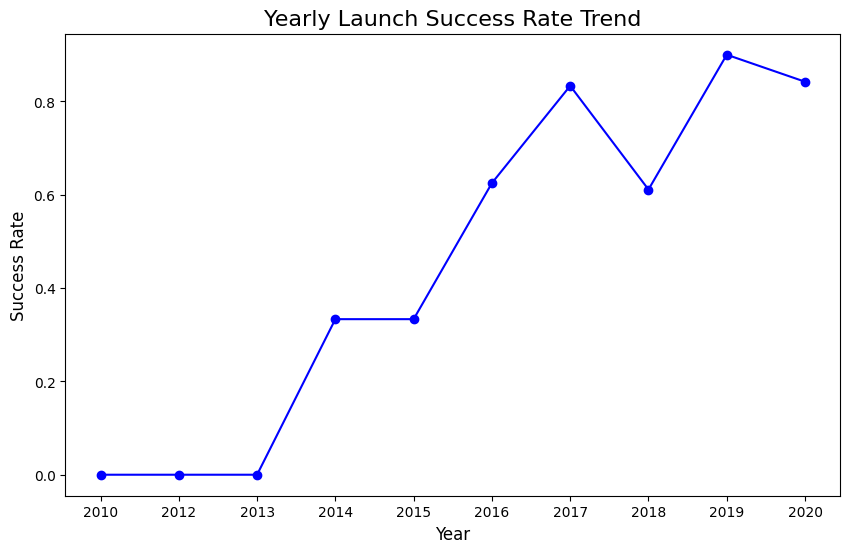

In [24]:
# Extract year from the Date column
def Extract_year(df):
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Add a new Year column to the dataframe
df['Year'] = Extract_year(df)

# Calculate the success rate per year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(10,6))

# Plot the yearly success rate trend
plt.plot(yearly_success_rate['Year'], yearly_success_rate['Class'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Yearly Launch Success Rate Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)

# Show the plot
plt.show()

* FlightNumber: Identifies the mission.
* Date: The launch date.
* BoosterVersion: The version of the booster used.
* PayloadMass: Mass of the payload.
* Orbit: Target orbit of the payload.
* LaunchSite: Location of the launch.
* Outcome: The result of the mission (e.g., successful or not).
* Flights, GridFins, Reused, Legs, Block, ReusedCount, Serial: Details about the rocket's features and performance.
* Longitude and Latitude: Geographical coordinates of the launch.

**Made By:**

Somia Moslhy Afify

Orkeed Walid Mandour